In [1]:
import sys
sys.path.append('/Users/apple/Desktop/DATA_590/HTI/src')
import pandas as pd
from dimensionality_reduction import principal_component_analysis, view_principal_components
from dimensionality_reduction import get_features_below_threshold, plot_variance_explained, return_csv

# PCA FOR PERINUCLEAR REGION 

In [2]:
pd.set_option('display.max_columns', None)
df_perinuclear = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjPerinuclear.csv', 
                            low_memory = False)

In [3]:
df_perinuclear.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [4]:
pca, columns, temp = principal_component_analysis(df_perinuclear,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


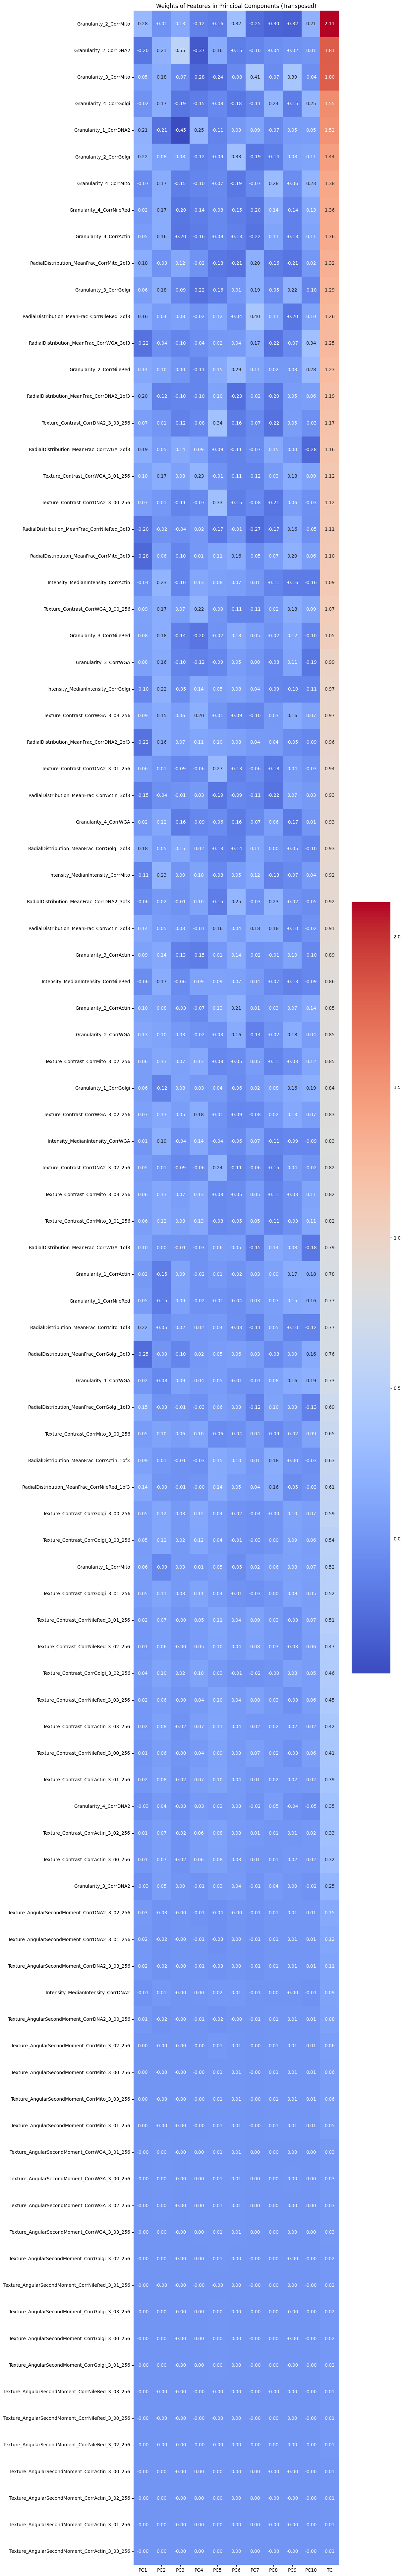

In [5]:
figure, weights_df_T = view_principal_components(pca,columns, number_of_components = 10)

In [6]:
weights_df_T.head()

0         1         2         3         4  \
Granularity_2_CorrMito   0.279627 -0.009940  0.134530 -0.124047 -0.155239   
Granularity_2_CorrDNA2  -0.195679  0.214190  0.551970 -0.367436  0.161203   
Granularity_3_CorrMito   0.047320  0.181810 -0.067144 -0.283720 -0.238879   
Granularity_4_CorrGolgi -0.024449  0.173459 -0.187897 -0.150492 -0.082922   
Granularity_1_CorrDNA2   0.210160 -0.211461 -0.447675  0.253055 -0.111241   

                                5         6         7         8         9  \
Granularity_2_CorrMito   0.324446 -0.248997 -0.304409 -0.319387  0.213945   
Granularity_2_CorrDNA2  -0.145055 -0.102935 -0.040472 -0.018018  0.010736   
Granularity_3_CorrMito  -0.076326  0.407862 -0.066394  0.388541 -0.039403   
Granularity_4_CorrGolgi -0.182468 -0.107534  0.241950 -0.148446  0.248061   
Granularity_1_CorrDNA2   0.029765  0.089658 -0.069118  0.045785  0.053718   

                         sum_of_abs_weights  
Granularity_2_CorrMito             2.114566  
Granularity_2_CorrDNA2             1.807695  
Granularity_3_CorrMito             1.797399  
Granularity_4_CorrGolgi            1.547677  
Granularity_1_CorrDNA2             1.521636

In [7]:
return_csv(weights_df_T,'/Users/apple/Desktop/Data_590/HTI/files/pca_perinuclear.csv')

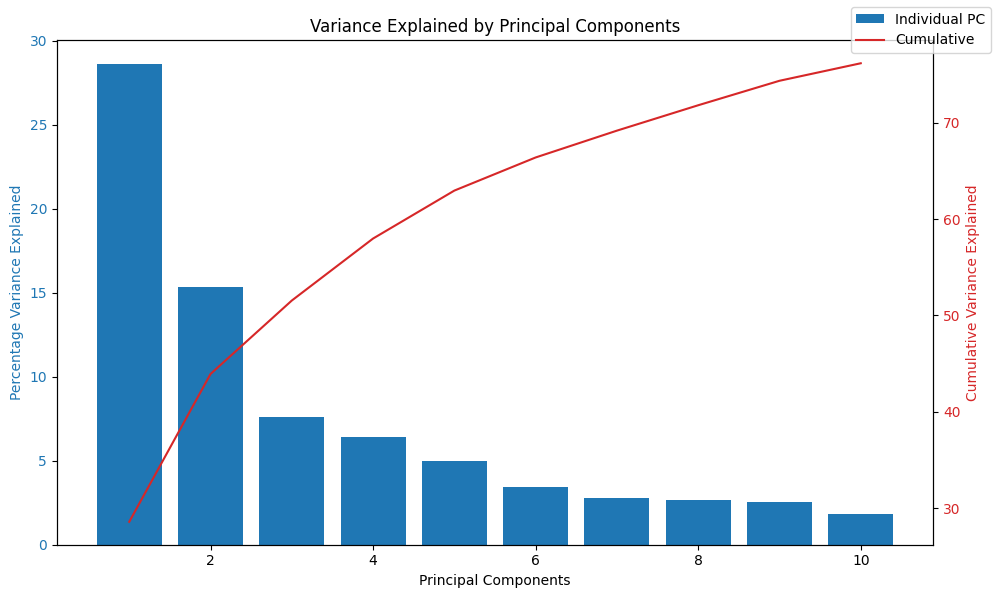

In [8]:
plot_variance_explained(pca)

# PCA for the Entire Cell

In [9]:
df_cell = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjCell.csv', 
                            low_memory = False)

In [10]:
df_cell.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [11]:
pca_cell, columns_cell, temp_2 = principal_component_analysis(df_cell,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


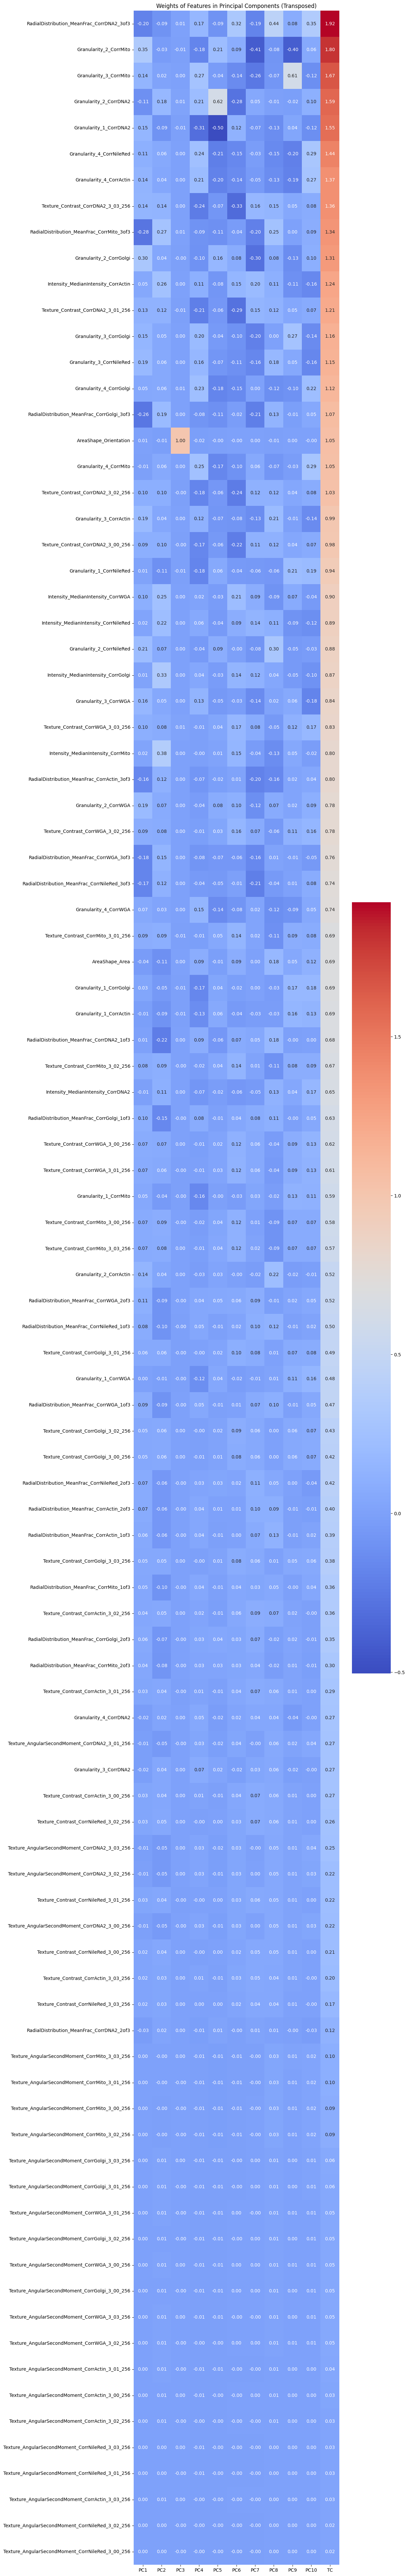

In [12]:
figure_cell, weights_df_T_cell = view_principal_components(pca_cell,columns_cell, number_of_components = 10)

In [13]:
return_csv(weights_df_T_cell,'/Users/apple/Desktop/Data_590/HTI/files/pca_cell.csv')

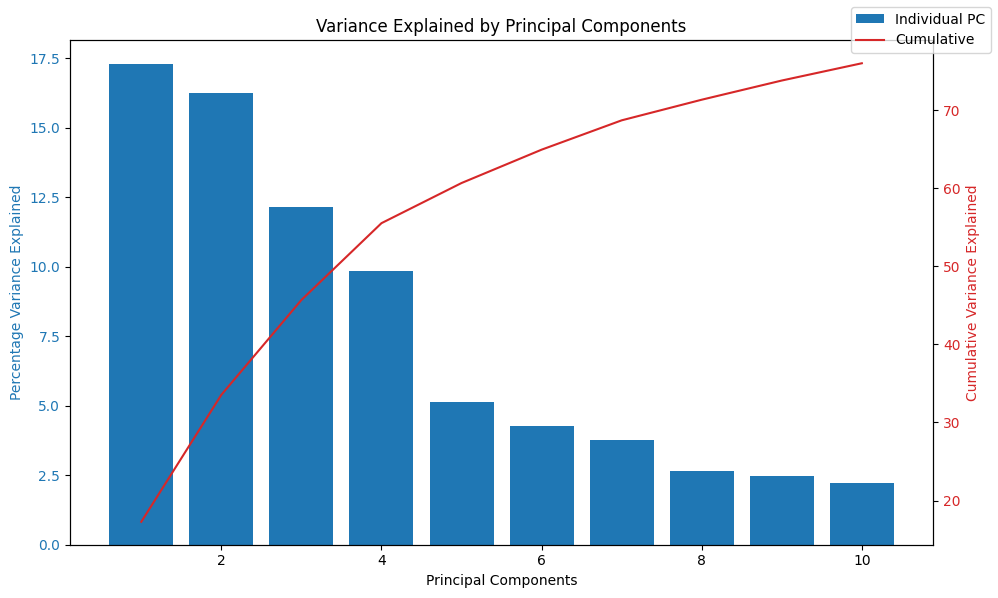

In [14]:
plot_variance_explained(pca_cell)

# PCA FOR ALL CYTO 

In [15]:
df_all_cyto = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjAllcyto.csv', 
                            low_memory = False)

In [16]:
df_all_cyto.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [17]:
pca_all_cyto, columns_all_cyto, temp_3 = principal_component_analysis(df_all_cyto,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


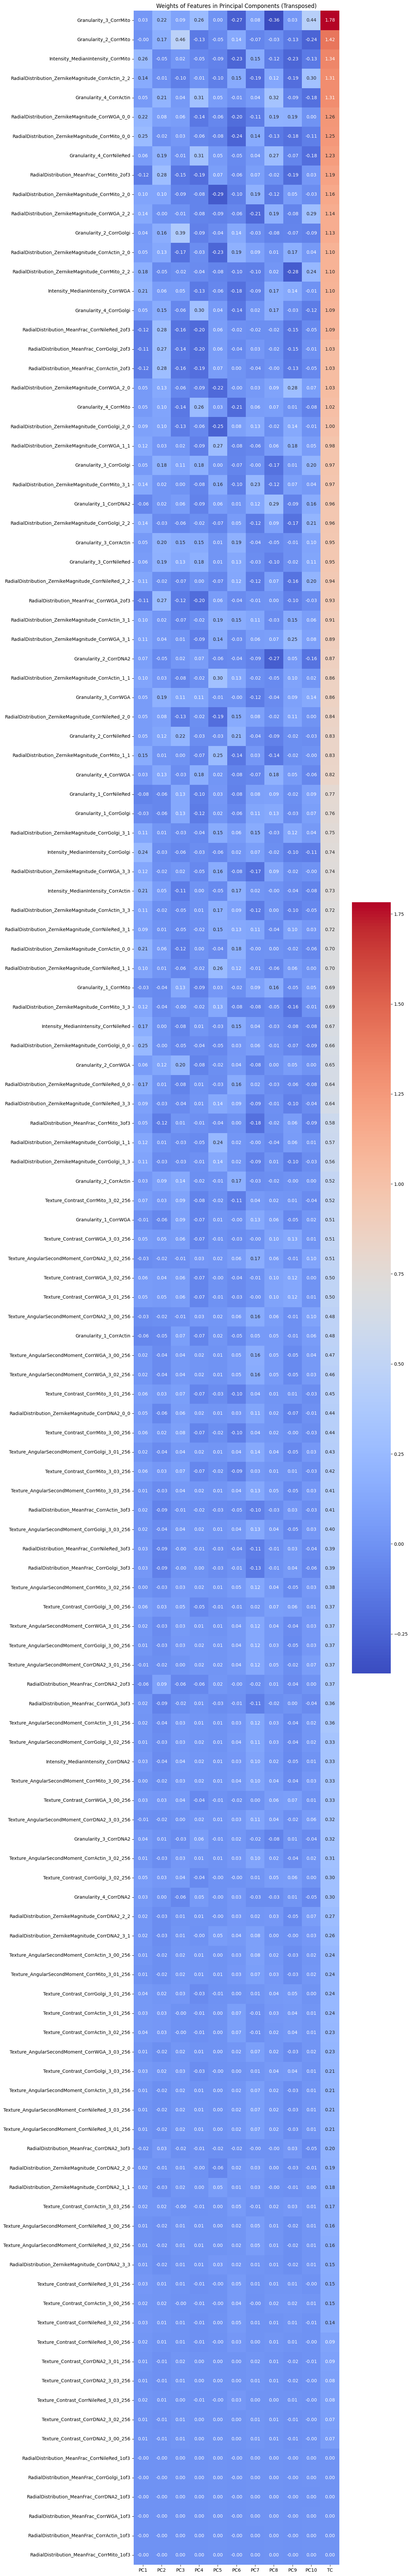

In [18]:
figure_all_cyto, weights_df_T_all_cyto = view_principal_components(pca_all_cyto,
                                                                   columns_all_cyto, number_of_components = 10)

In [19]:
return_csv(weights_df_T_all_cyto,'/Users/apple/Desktop/Data_590/HTI/files/pca_all_cyto.csv')

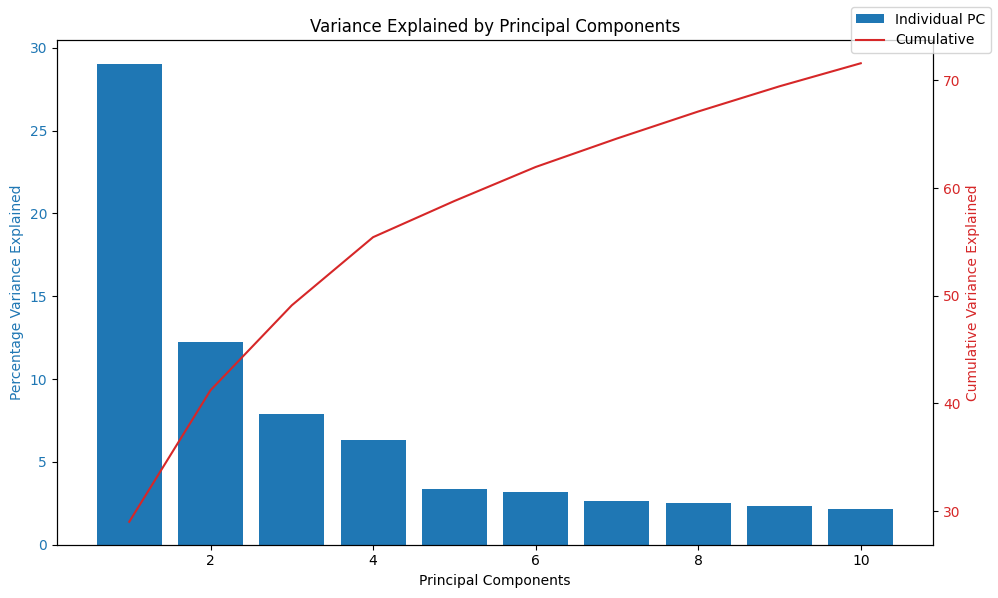

In [20]:
plot_variance_explained(pca_all_cyto)

# PCA FOR ONLY NUCLEI

In [21]:
df_nuclei = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjNuclei.csv', 
                            low_memory = False)

In [22]:
df_nuclei.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

Has nothing to perform PCA on

# PCA for Perinculear Cyto

In [23]:
df_perinucCyto = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjPerinucCyto.csv', 
                            low_memory = False)

In [24]:
df_perinucCyto.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [25]:
pca_perinucCyto, columns_perinucCyto, temp_3 = principal_component_analysis(df_perinucCyto,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


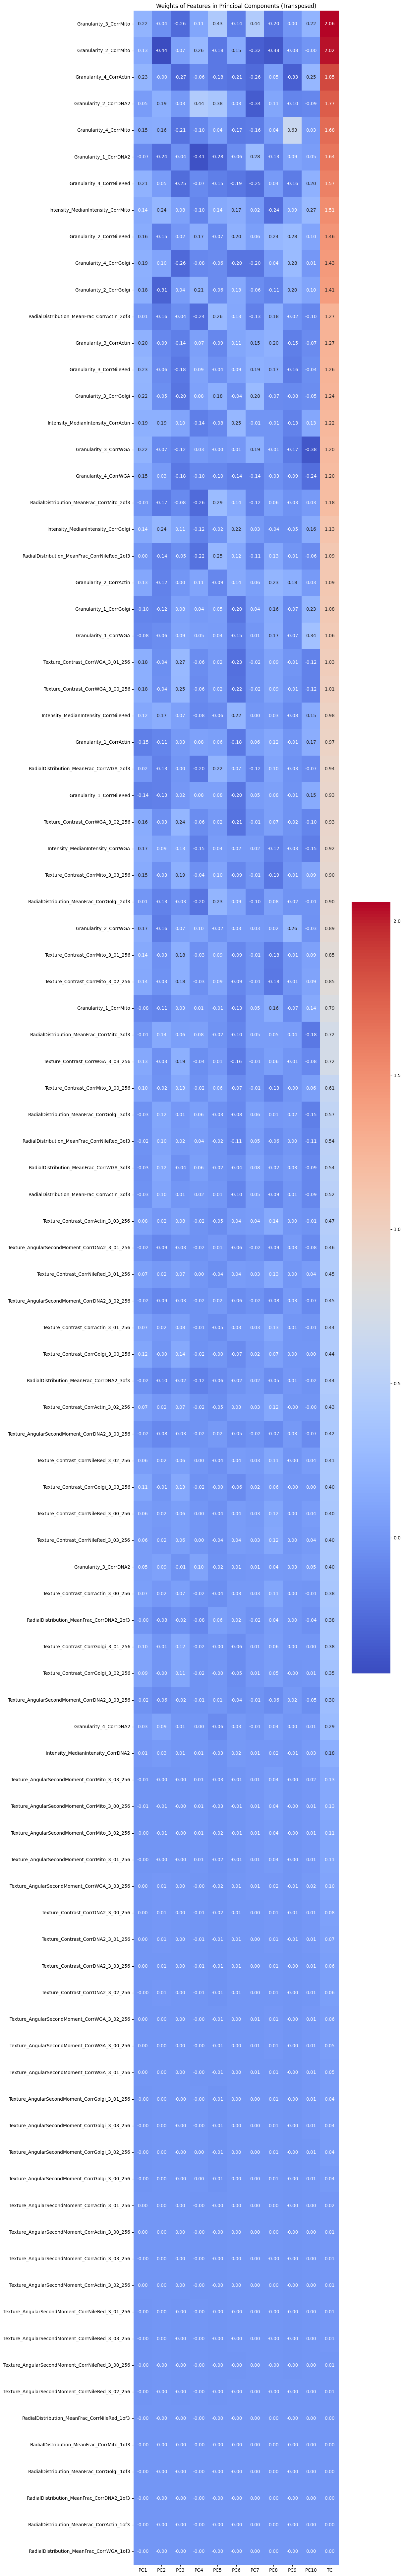

In [26]:
figure_perinucCyto, weights_df_T_perinucCyto = view_principal_components(pca_perinucCyto,
                                                                   columns_perinucCyto, number_of_components = 10)

In [27]:
return_csv(weights_df_T_perinucCyto,'/Users/apple/Desktop/Data_590/HTI/files/pca_perinucCyto.csv')

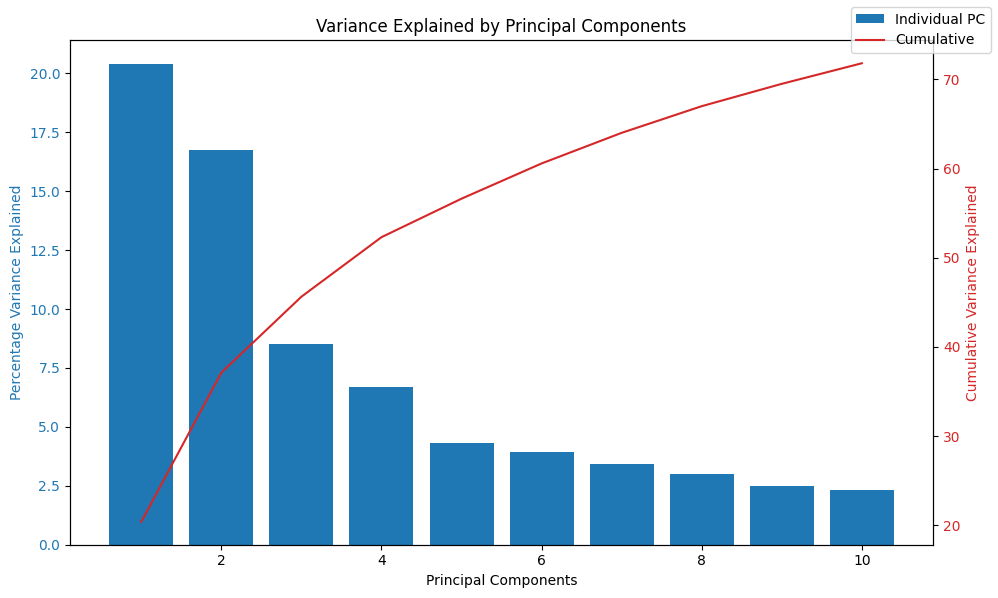

In [28]:
plot_variance_explained(pca_perinucCyto)